In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
df = pd.read_csv("Tesla.csv")

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [50]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_numerical = df[numerical_cols].copy()

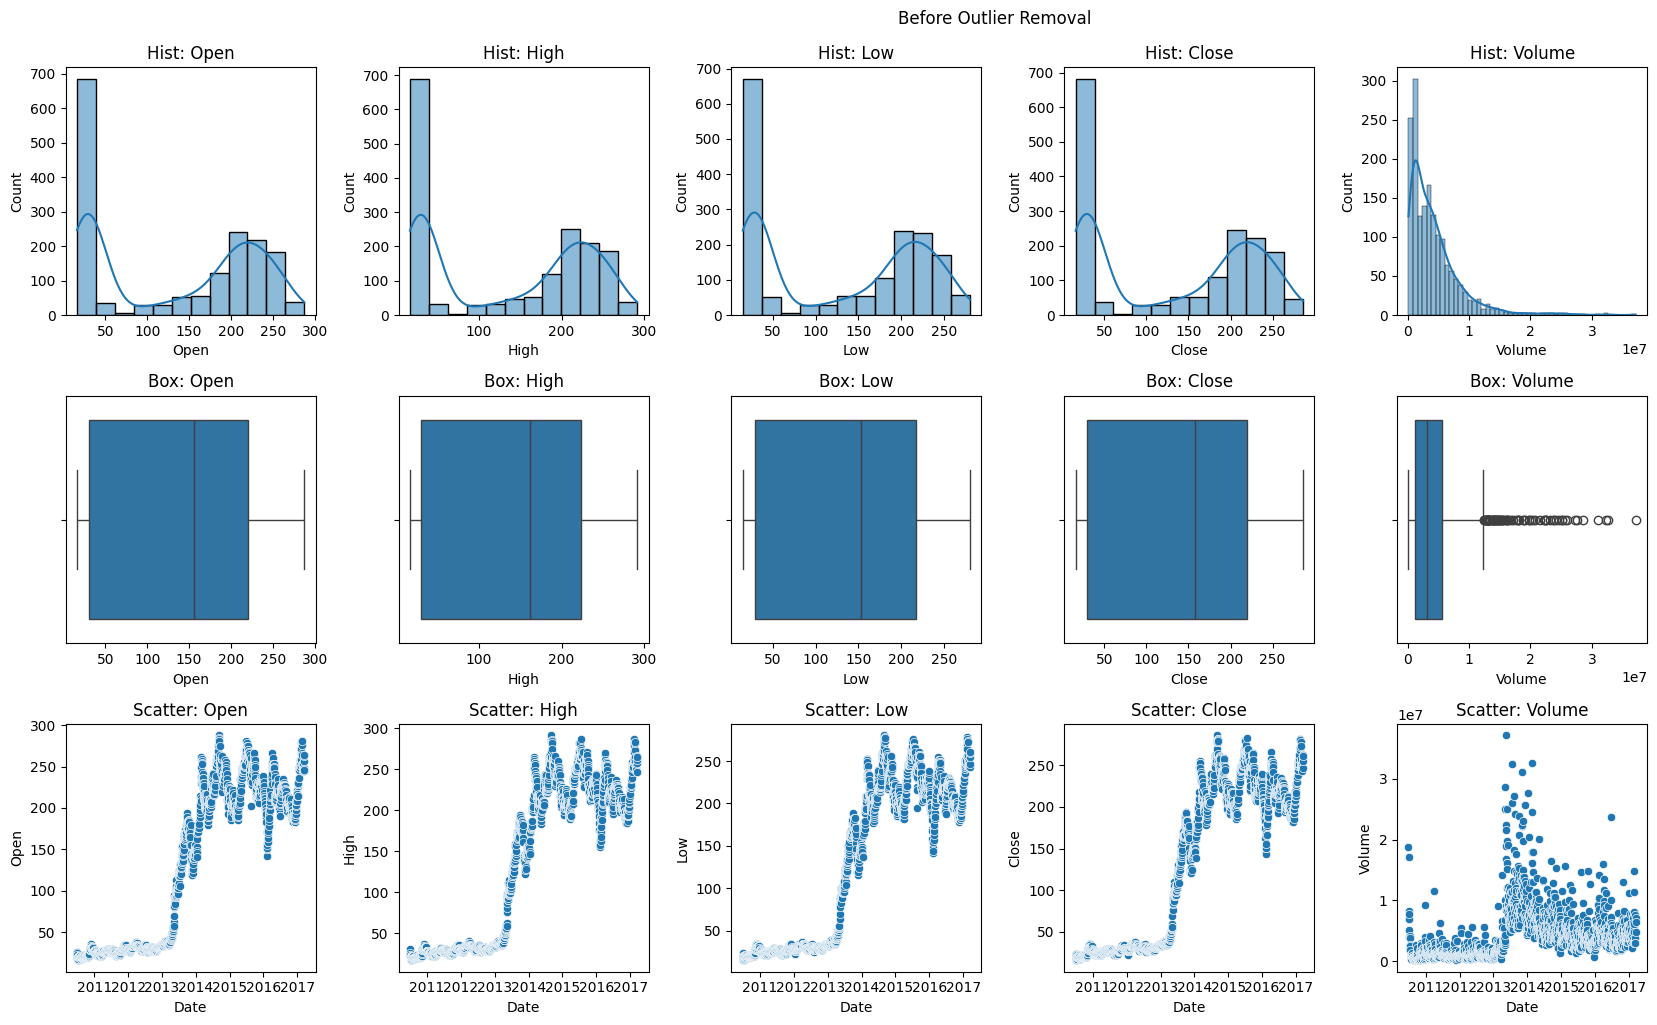

In [51]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 6, i+1)
    sns.histplot(df_numerical[col], kde=True)
    plt.title(f'Hist: {col}')

    plt.subplot(3, 6, i+7)
    sns.boxplot(x=df_numerical[col])
    plt.title(f'Box: {col}')

    plt.subplot(3, 6, i+13)
    sns.scatterplot(x=df_numerical.index, y=df_numerical[col])
    plt.title(f'Scatter: {col}')
plt.tight_layout()
plt.suptitle("Before Outlier Removal", y=1.02)
plt.show()

In [52]:
print("Skewness Before Outlier Removal:\n", df_numerical.skew())
print("\nKurtosis Before Outlier Removal:\n", df_numerical.kurtosis())

Skewness Before Outlier Removal:
 Open     -0.027406
High     -0.034235
Low      -0.021055
Close    -0.028001
Volume    2.541038
dtype: float64

Kurtosis Before Outlier Removal:
 Open     -1.755268
High     -1.758691
Low      -1.752295
Close    -1.755399
Volume    9.782261
dtype: float64


In [53]:
df_clean = df_numerical[(np.abs(zscore(df_numerical)) < 3).all(axis=1)]

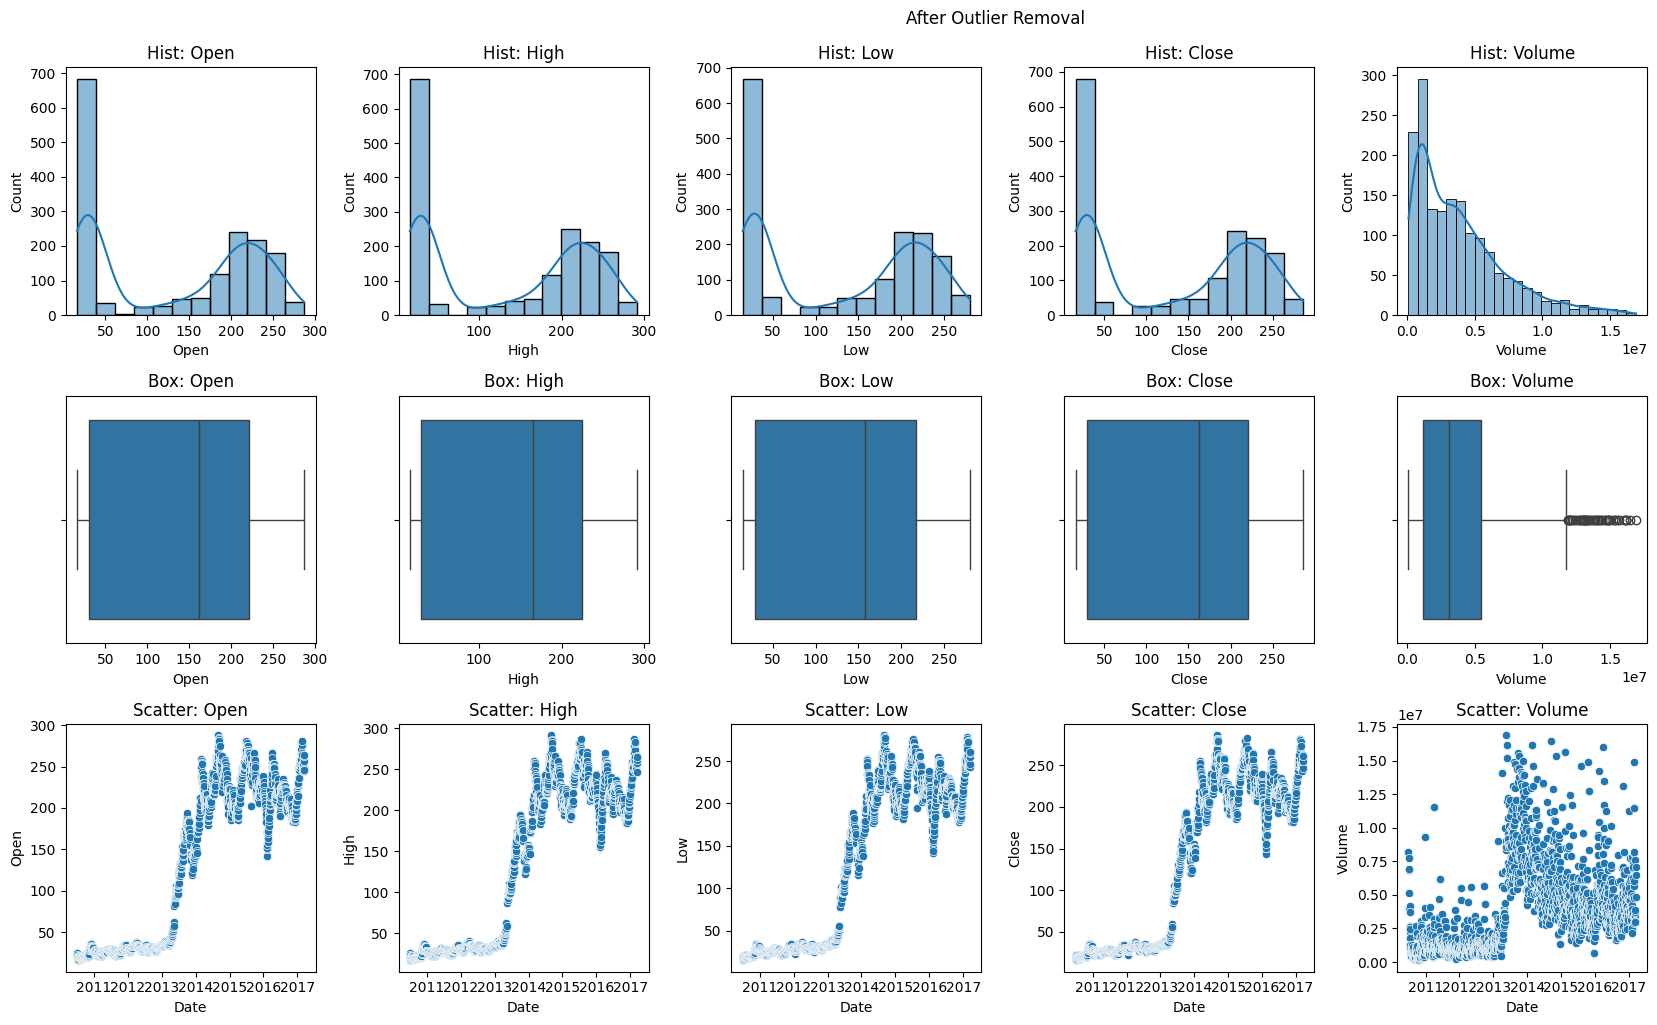

In [54]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 6, i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Hist: {col}')

    plt.subplot(3, 6, i+7)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Box: {col}')

    plt.subplot(3, 6, i+13)
    sns.scatterplot(x=df_clean.index, y=df_clean[col])
    plt.title(f'Scatter: {col}')
plt.tight_layout()
plt.suptitle("After Outlier Removal", y=1.02)
plt.show()

In [55]:
print("Skewness After Outlier Removal:\n", df_clean.skew())
print("\nKurtosis After Outlier Removal:\n", df_clean.kurtosis())


Skewness After Outlier Removal:
 Open     -0.025055
High     -0.030603
Low      -0.020414
Close    -0.025859
Volume    1.294076
dtype: float64

Kurtosis After Outlier Removal:
 Open     -1.770316
High     -1.773931
Low      -1.766900
Close    -1.770385
Volume    1.478753
dtype: float64


In [57]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, preds),
        'MSE': mean_squared_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

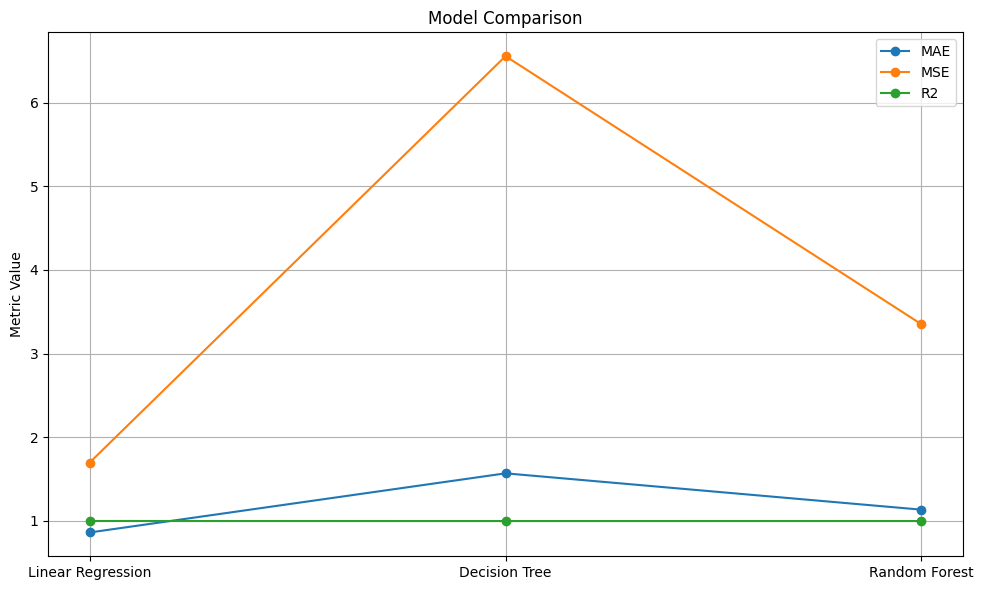

In [59]:
plt.figure(figsize=(10, 6))
for metric in ['MAE', 'MSE', 'R2']:
    plt.plot(results.keys(), [results[m][metric] for m in results], marker='o', label=metric)

plt.title("Model Comparison")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
pd.DataFrame(results).T

,MAE,MSE,R2
Linear Regression,0.862834,1.698991,0.999814
Decision Tree,1.569638,6.556097,0.999283
Random Forest,1.135383,3.352117,0.999633


In [61]:
results_df = pd.DataFrame(results).T

<ipython-input-62-5aa1273e4a06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
<ipython-input-62-5aa1273e4a06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
<ipython-input-62-5aa1273e4a06>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')


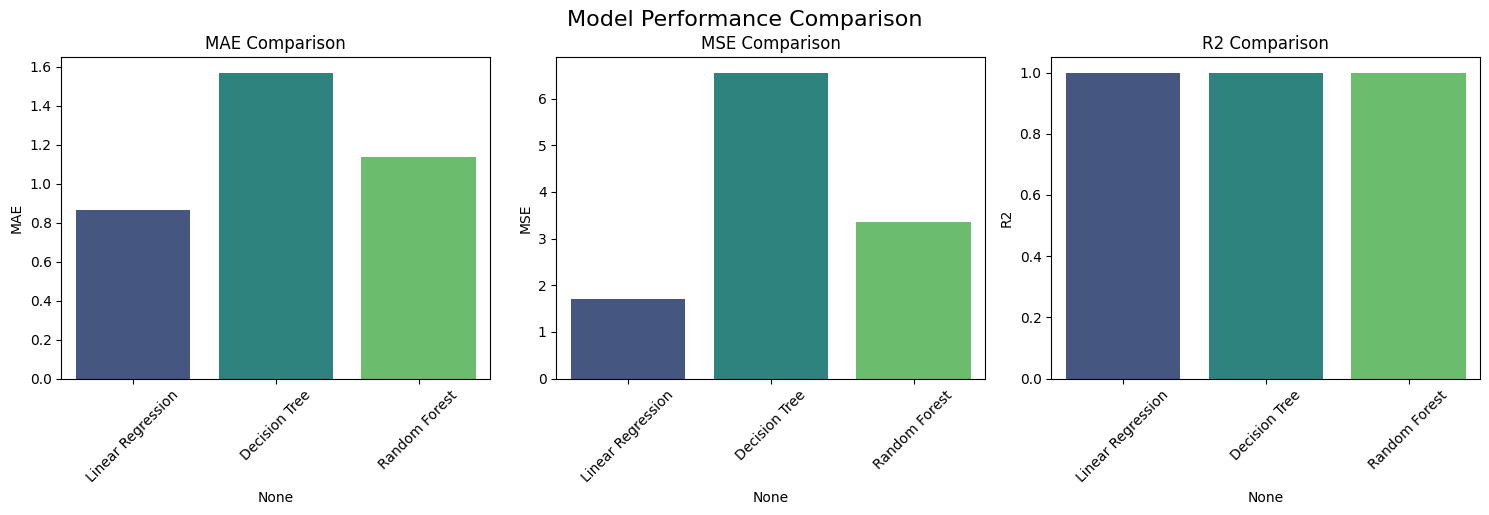

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['MAE', 'MSE', 'R2']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=16, y=1.02)
plt.show()
